In [1]:
import pandas as pd
#https://4geeks.com/syllabus/spain-ds-pt-3/read/exploratory-data-analysis-and-cleaning-with-titanic
#https://4geeks.com/syllabus/spain-ds-pt-3/project/logistic-regression-project-tutorial

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url)

In [3]:
df = pd.read_csv(url, sep=';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.shape

(41188, 21)

In [6]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
print(df.duplicated().sum())

12


In [8]:
duplicates = df[df.duplicated()]

# Mostrar las filas duplicadas
print("Filas duplicadas:")
print(duplicates)

Filas duplicadas:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retire

In [9]:
duplicates_count = df[df.duplicated(keep=False)].value_counts()

# Mostrar el conteo de duplicados
print("Conteo de valores duplicados:")
print(duplicates_count)

Conteo de valores duplicados:
age  job          marital   education            default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
24   services     single    high.school          no       yes      no    cellular   apr    tue          114       1         999    0         nonexistent  -1.8          93.075          -47.1          1.423      5099.1       no     2
27   technician   single    professional.course  no       no       no    cellular   jul    mon          331       2         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     2
32   technician   single    professional.course  no       yes      no    cellular   jul    thu          128       1         999    0         nonexistent   1.4          93.918          -42.7          4.968      5228.1       no     2
35   admin.       married   university.degree  

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(41176, 21)

In [12]:
df.drop(["contact", "month", "day_of_week", "pdays", "previous", "nr.employed"], axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   poutcome        41176 non-null  object 
 10  emp.var.rate    41176 non-null  float64
 11  cons.price.idx  41176 non-null  float64
 12  cons.conf.idx   41176 non-null  float64
 13  euribor3m       41176 non-null  float64
 14  y               41176 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 5.0+ MB


Variables categoricas

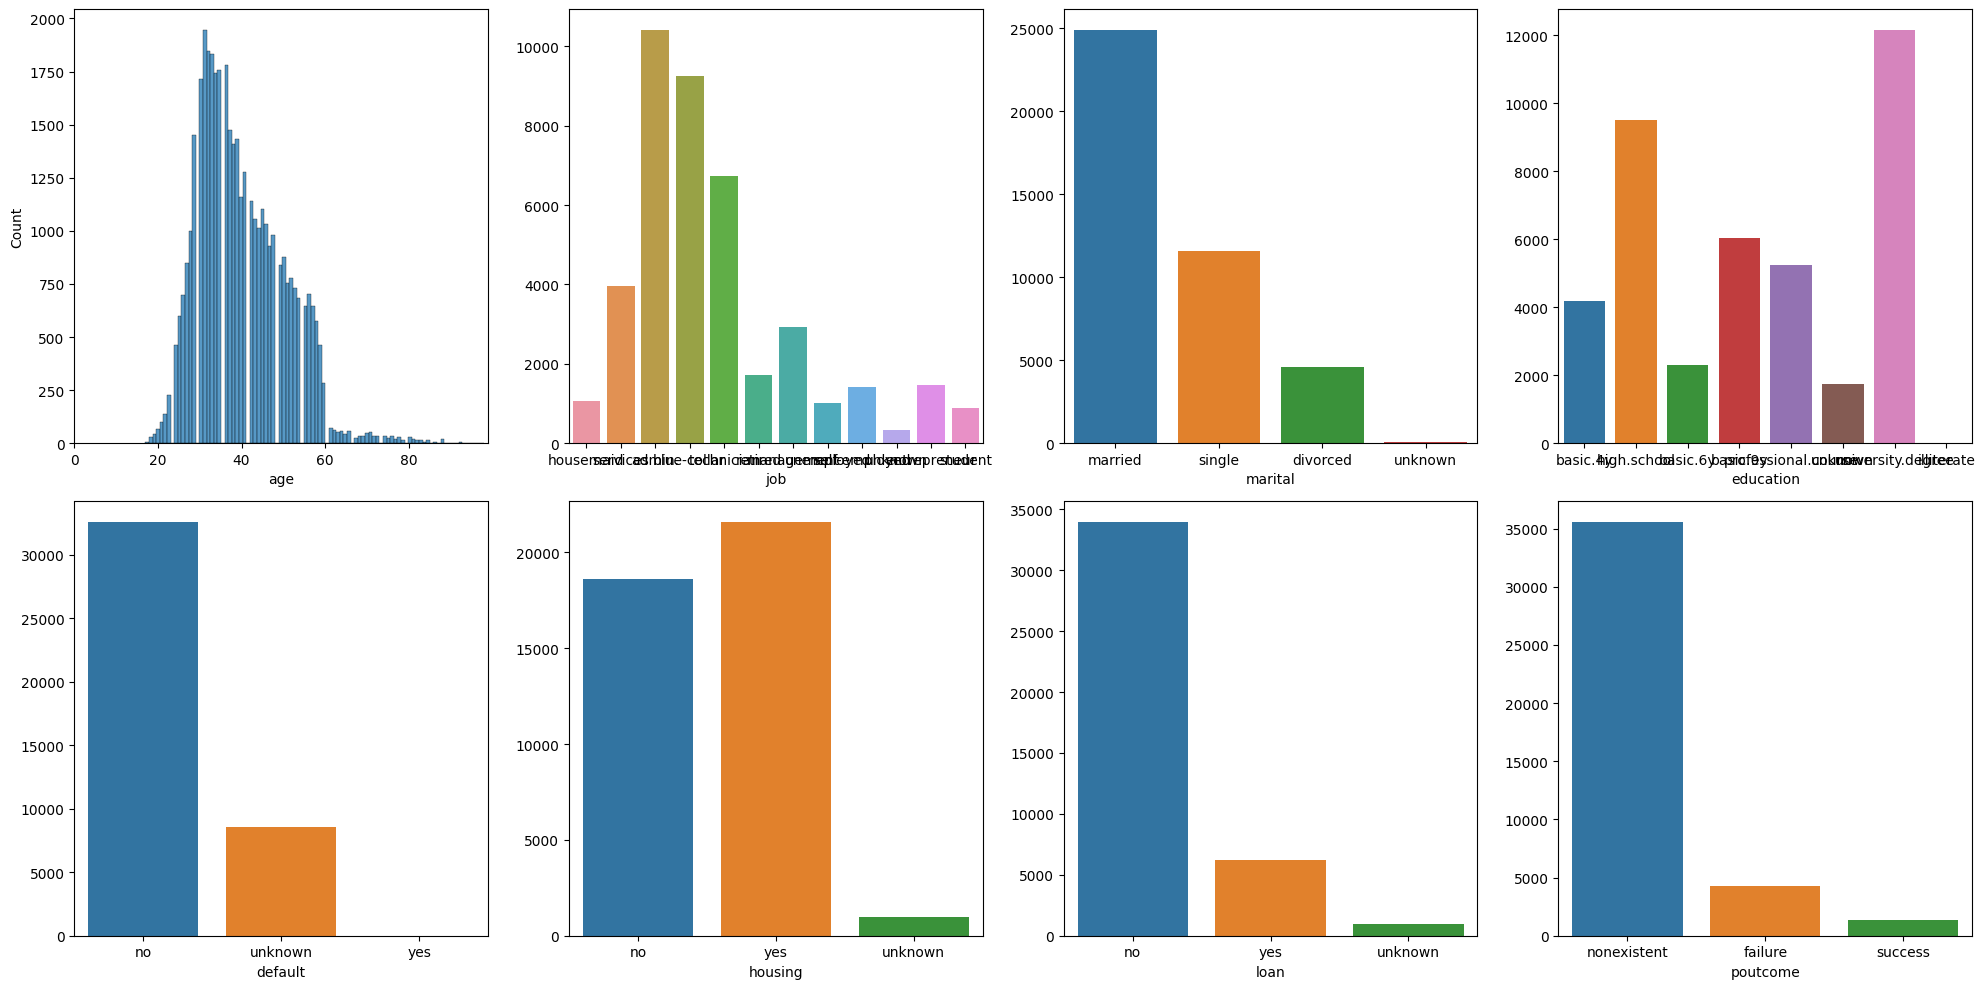

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un objeto figura y ejes con subgráficos 2x4
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Crear histogramas para cada variable
sns.histplot(data=df, x="age", ax=axes[0, 0]).set_xlim(0, 99)
sns.countplot(data=df, x="job", ax=axes[0, 1]).set(ylabel=None)
sns.countplot(data=df, x="marital", ax=axes[0, 2]).set(ylabel=None)
sns.countplot(data=df, x="education", ax=axes[0, 3]).set(ylabel=None)
sns.countplot(data=df, x="default", ax=axes[1, 0]).set(ylabel=None)
sns.countplot(data=df, x="housing", ax=axes[1, 1]).set(ylabel=None)

# Añadir las variables 'loan' y 'poutcome'
sns.countplot(data=df, x="loan", ax=axes[1, 2]).set(ylabel=None)
sns.countplot(data=df, x="poutcome", ax=axes[1, 3]).set(ylabel=None)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Variables numericas

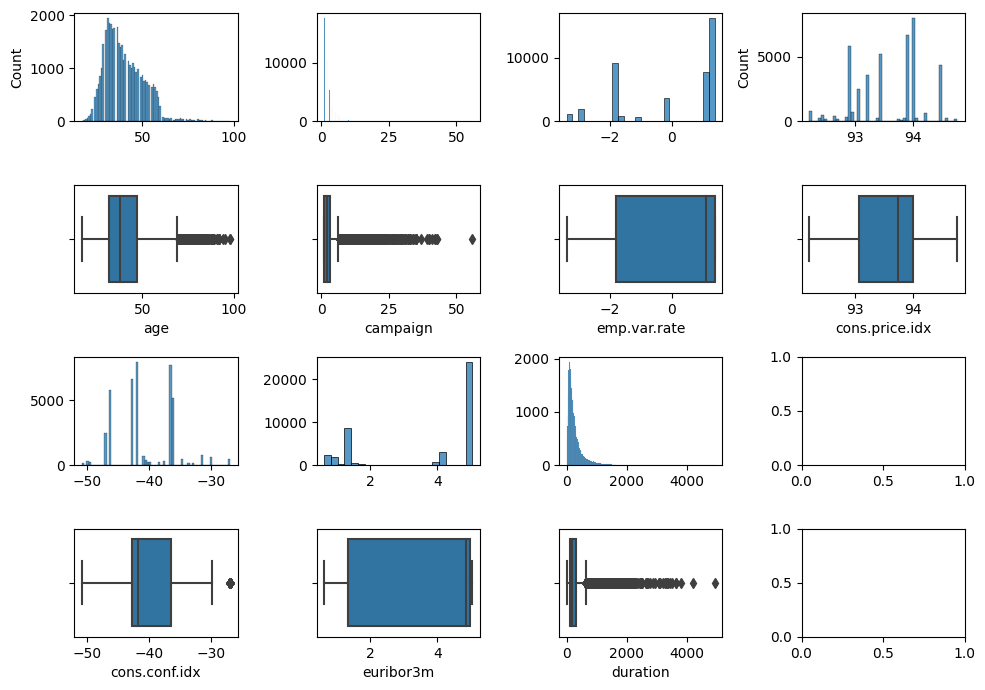

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un objeto figura y ejes con subgráficos 4x4
fig, axes = plt.subplots(4, 4, figsize=(10, 7))

# Crear histogramas y boxplots para las variables numéricas
sns.histplot(ax=axes[0, 0], data=df, x="age").set(xlabel=None)
sns.boxplot(ax=axes[1, 0], data=df, x="age")
sns.histplot(ax=axes[0, 1], data=df, x="campaign").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[1, 1], data=df, x="campaign")
sns.histplot(ax=axes[0, 2], data=df, x="emp.var.rate").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[1, 2], data=df, x="emp.var.rate")
sns.histplot(ax=axes[0, 3], data=df, x="cons.price.idx").set(xlabel=None)
sns.boxplot(ax=axes[1, 3], data=df, x="cons.price.idx")

sns.histplot(ax=axes[2, 0], data=df, x="cons.conf.idx").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 0], data=df, x="cons.conf.idx")
sns.histplot(ax=axes[2, 1], data=df, x="euribor3m").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 1], data=df, x="euribor3m")
sns.histplot(ax=axes[2, 2], data=df, x="duration").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 2], data=df, x="duration")

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


multivariables

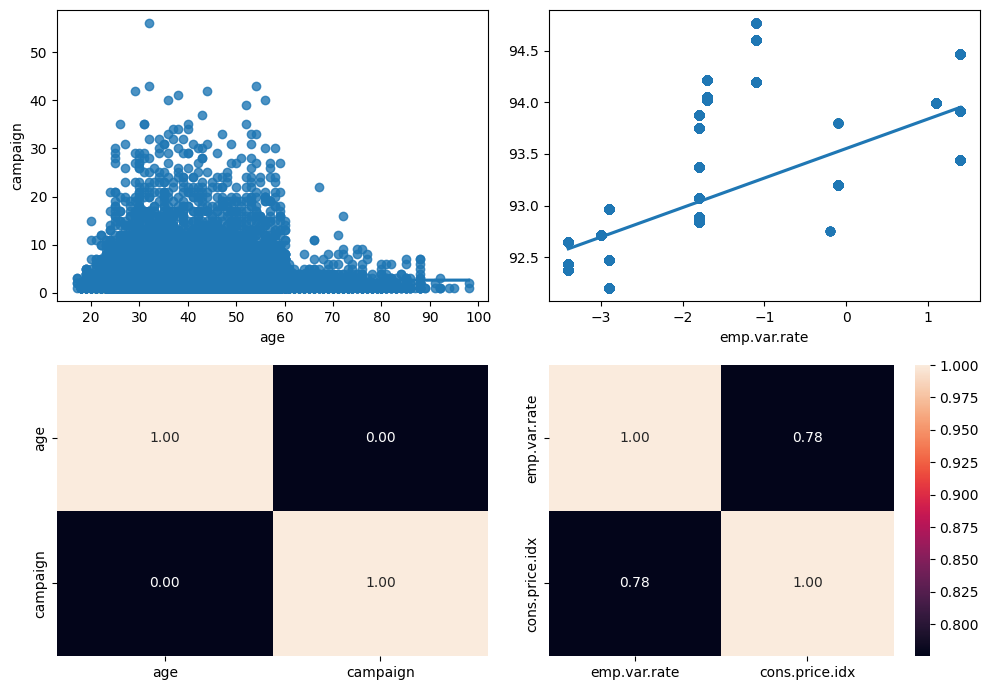

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Crear un diagrama de dispersión
sns.regplot(ax=axis[0, 0], data=df, x="age", y="campaign")
sns.heatmap(df[["age", "campaign"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Puedes reemplazar "emp.var.rate" y "cons.price.idx" con las variables de interés
sns.regplot(ax=axis[0, 1], data=df, x="emp.var.rate", y="cons.price.idx").set(ylabel=None)
sns.heatmap(df[["emp.var.rate", "cons.price.idx"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()



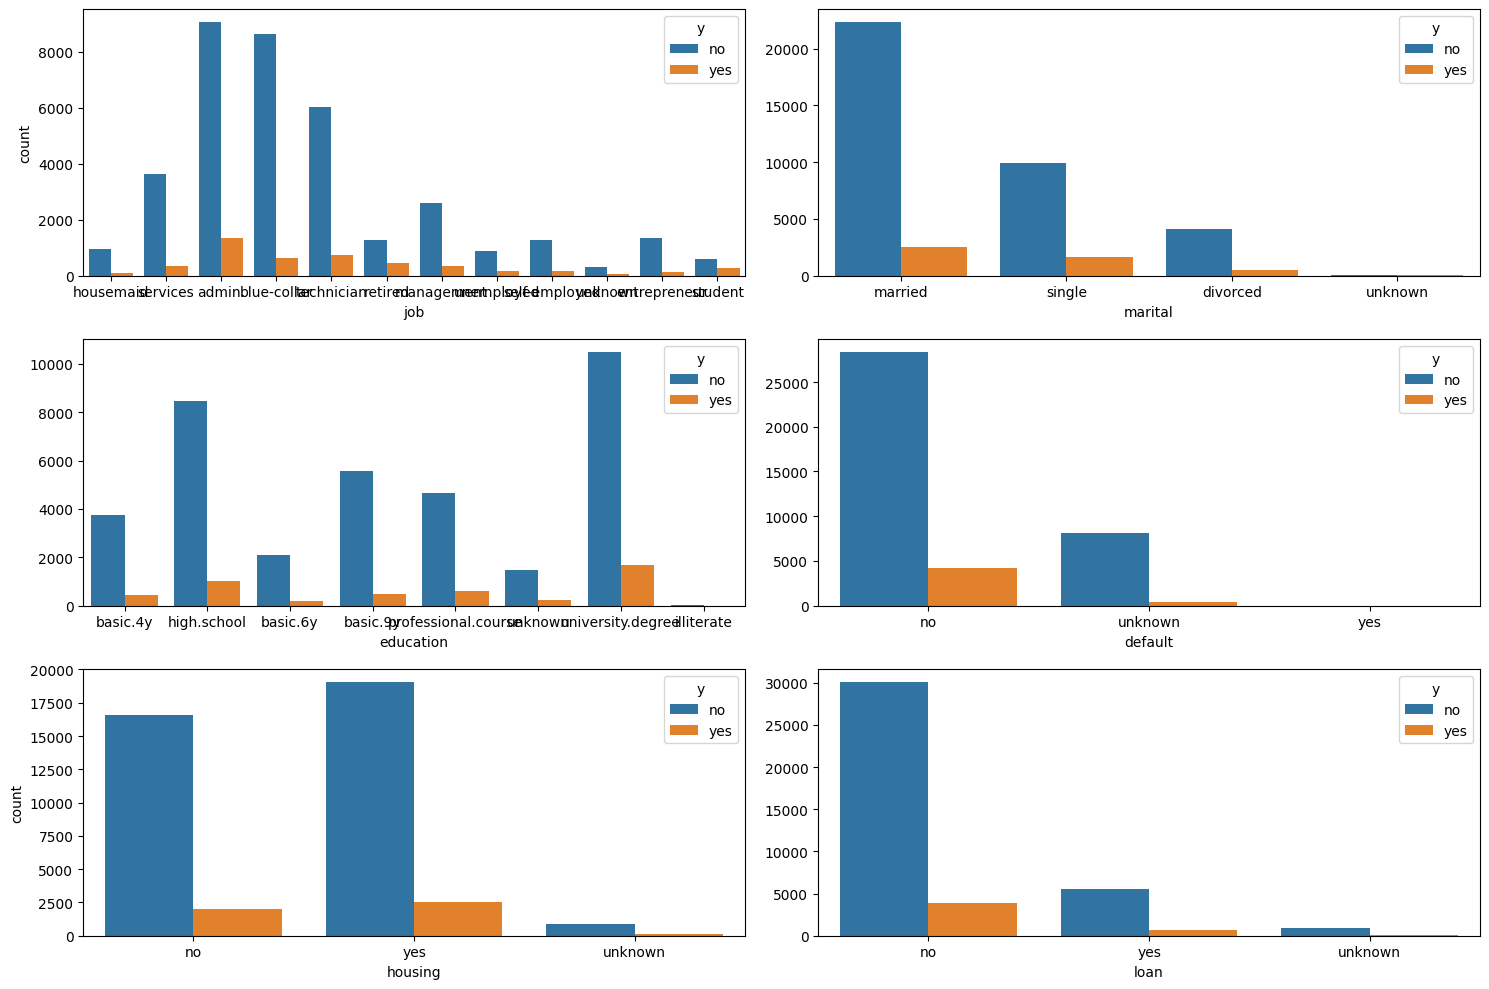

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'df'
# Asegúrate de tener las bibliotecas y el DataFrame correctamente cargados antes de ejecutar este código

# df.info()

# Análisis de la clase máster ("y") frente a las características categóricas
fig, axis = plt.subplots(3, 2, figsize=(15, 10))

sns.countplot(ax=axis[0, 0], data=df, x="job", hue="y")
sns.countplot(ax=axis[0, 1], data=df, x="marital", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=df, x="education", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 1], data=df, x="default", hue="y").set(ylabel=None)
sns.countplot(ax=axis[2, 0], data=df, x="housing", hue="y")
sns.countplot(ax=axis[2, 1], data=df, x="loan", hue="y").set(ylabel=None)
#falta poutcome

plt.tight_layout()

plt.show()


Combinaciones de la clase con varias predictoras

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   poutcome        41176 non-null  object 
 10  emp.var.rate    41176 non-null  float64
 11  cons.price.idx  41176 non-null  float64
 12  cons.conf.idx   41176 non-null  float64
 13  euribor3m       41176 non-null  float64
 14  y               41176 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 5.0+ MB


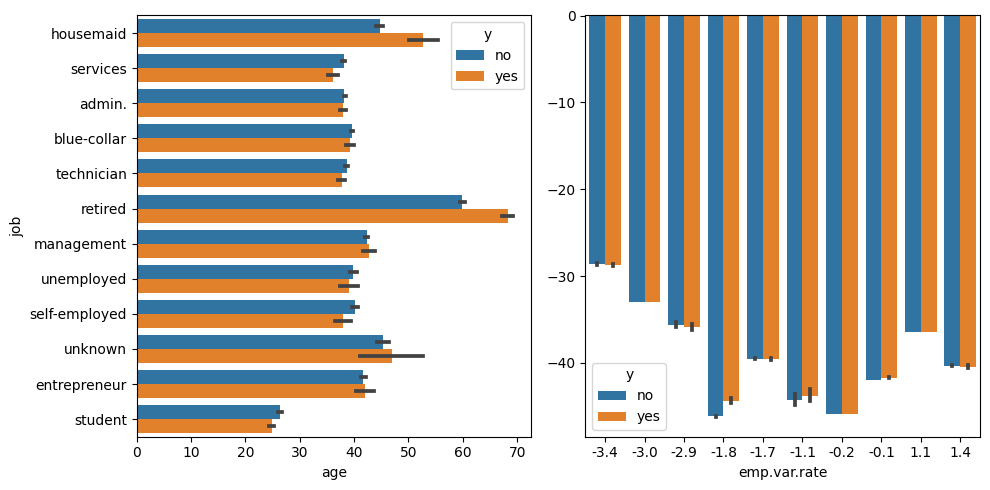

In [20]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df, x = "age", y = "job", hue = "y")
sns.barplot(ax = axis[1], data = df, x = "emp.var.rate", y = "cons.conf.idx", hue = "y").set(ylabel = None)

plt.tight_layout()

plt.show()

Análisis de correlaciones

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   poutcome        41176 non-null  object 
 10  emp.var.rate    41176 non-null  float64
 11  cons.price.idx  41176 non-null  float64
 12  cons.conf.idx   41176 non-null  float64
 13  euribor3m       41176 non-null  float64
 14  y               41176 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 5.0+ MB


<ipython-input-22-12622559564f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[["job", "marital", "education", "default", "housing", "loan", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]].corr(), annot = True, fmt = ".2f")


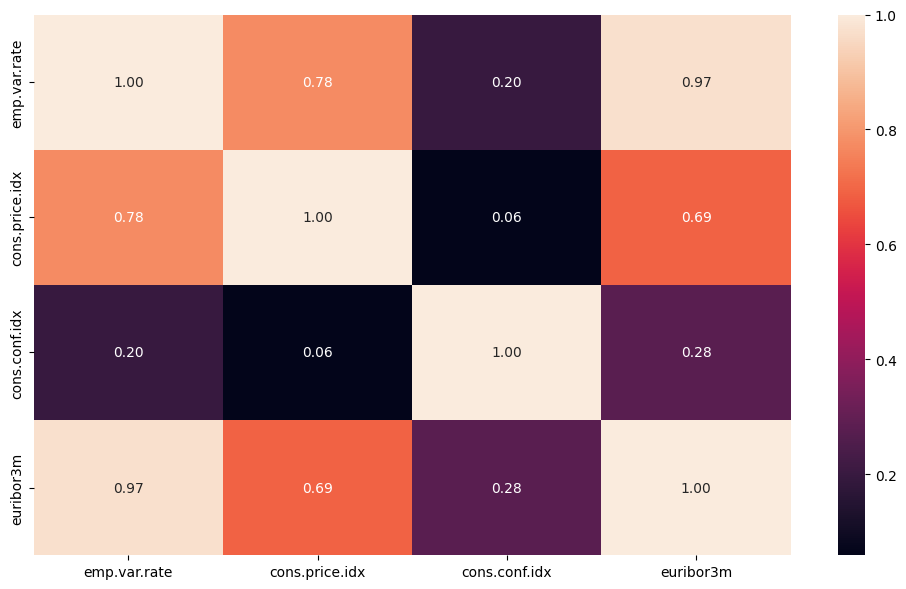

In [22]:
df["age"] = pd.factorize(df["age"])[0]
df["y"] = pd.factorize(df["y"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["job", "marital", "education", "default", "housing", "loan", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

<ipython-input-23-4decfb51a9ca>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_selected.corr()


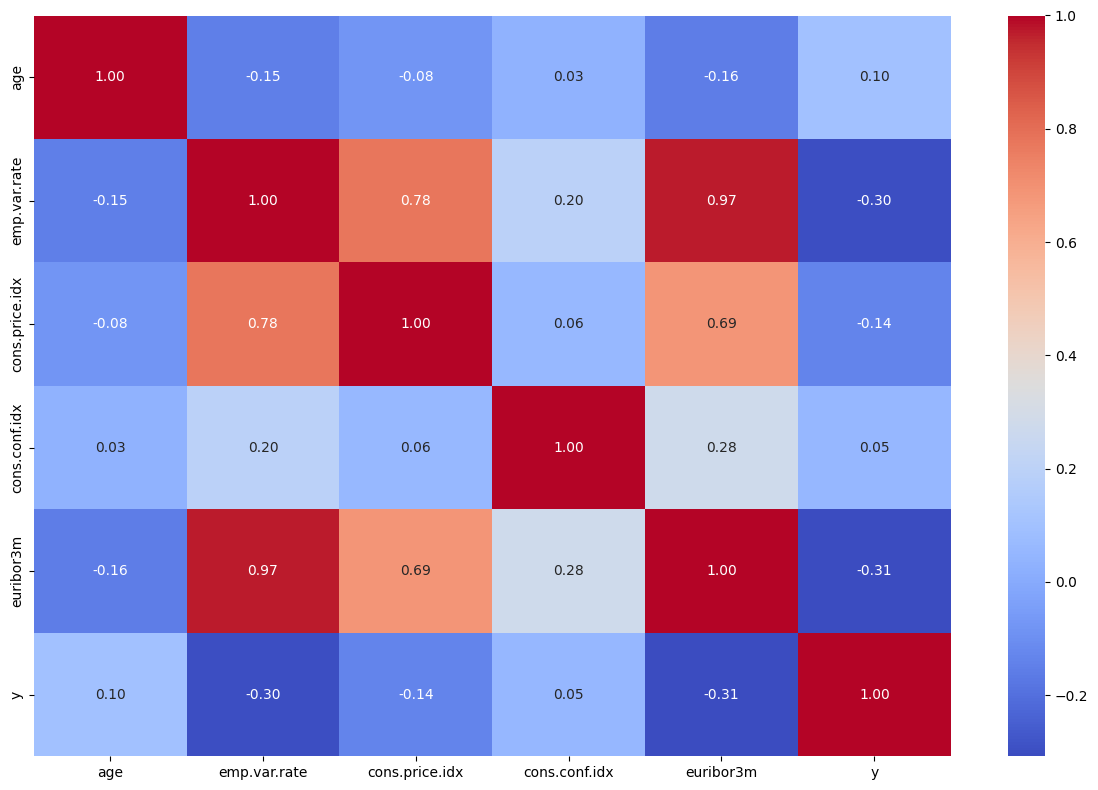

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya has realizado la factorización de las variables "age" y "y"
# df["age"] = pd.factorize(df["age"])[0]
# df["y"] = pd.factorize(df["y"])[0]

# Crear un DataFrame con las variables de interés
selected_columns = ["age", "job", "marital", "education", "default", "housing", "loan", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "y"]
df_selected = df[selected_columns]

# Calcular la matriz de correlación de punto biserial
correlation_matrix = df_selected.corr()

# Crear un mapa de calor
fig, axis = plt.subplots(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.tight_layout()
plt.show()


In [24]:

# Seleccionar las columnas de interés
selected_columns = ["age", "job", "marital", "education", "default", "housing", "loan", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "y"]
df_selected = df[selected_columns]

# Calcular la correlación numérica
correlation_matrix = df_selected.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                     age  emp.var.rate  cons.price.idx  cons.conf.idx  \
age             1.000000     -0.149926       -0.082309       0.030449   
emp.var.rate   -0.149926      1.000000        0.775293       0.196257   
cons.price.idx -0.082309      0.775293        1.000000       0.059170   
cons.conf.idx   0.030449      0.196257        0.059170       1.000000   
euribor3m      -0.155226      0.972244        0.688180       0.277864   
y               0.097884     -0.298289       -0.136134       0.054802   

                euribor3m         y  
age             -0.155226  0.097884  
emp.var.rate     0.972244 -0.298289  
cons.price.idx   0.688180 -0.136134  
cons.conf.idx    0.277864  0.054802  
euribor3m        1.000000 -0.307740  
y               -0.307740  1.000000  


<ipython-input-24-a191db81d300>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_selected.corr()


Interpretación de la correlación:

✅age vs. emp.var.rate: La correlación es aproximadamente -0.15. Indica una correlación negativa débil entre la edad y la tasa de variación del empleo. Esto podría sugerir que las personas más jóvenes tienden a experimentar mayores variaciones en las tasas de empleo.

✅age vs. euribor3m: La correlación es aproximadamente -0.16. Indica una correlación negativa débil entre la edad y la tasa Euribor a 3 meses. Puede significar que las personas más jóvenes podrían tener tasas Euribor más altas.

✅emp.var.rate vs. euribor3m: La correlación es alta y positiva, alrededor de 0.97. Esto es esperado, ya que la tasa de variación del empleo (emp.var.rate) y la tasa Euribor a 3 meses (euribor3m) están relacionadas en el contexto económico.

✅emp.var.rate vs. y: La correlación es aproximadamente -0.30. Indica una correlación moderadamente negativa entre la tasa de variación del empleo y la variable objetivo "y". Esto sugiere que a medida que la tasa de variación del empleo disminuye, es más probable que la variable objetivo "y" sea positiva (indicando la realización de un depósito a largo plazo).

✅euribor3m vs. y: La correlación es aproximadamente -0.31. Similar a la correlación anterior, sugiere que a medida que la tasa Euribor a 3 meses disminuye, es más probable que la variable objetivo "y" sea positiva.

Foco por tanto en:
- emp.var.rate vs. euribor3m:
- cons.price.idx vs emp.var.rate

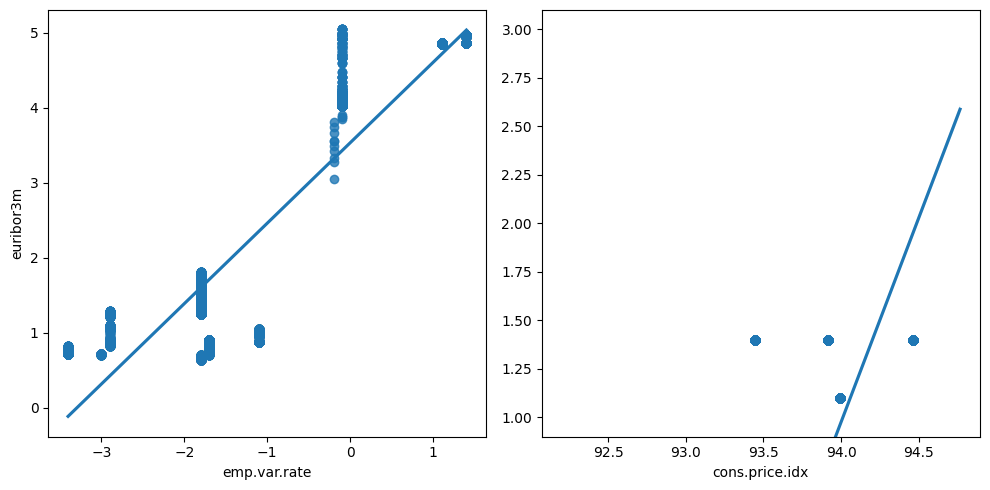

In [25]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = df, x = "emp.var.rate", y = "euribor3m")
sns.regplot(ax = axis[1], data = df, x = "cons.price.idx", y = "emp.var.rate").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

Todos juntos


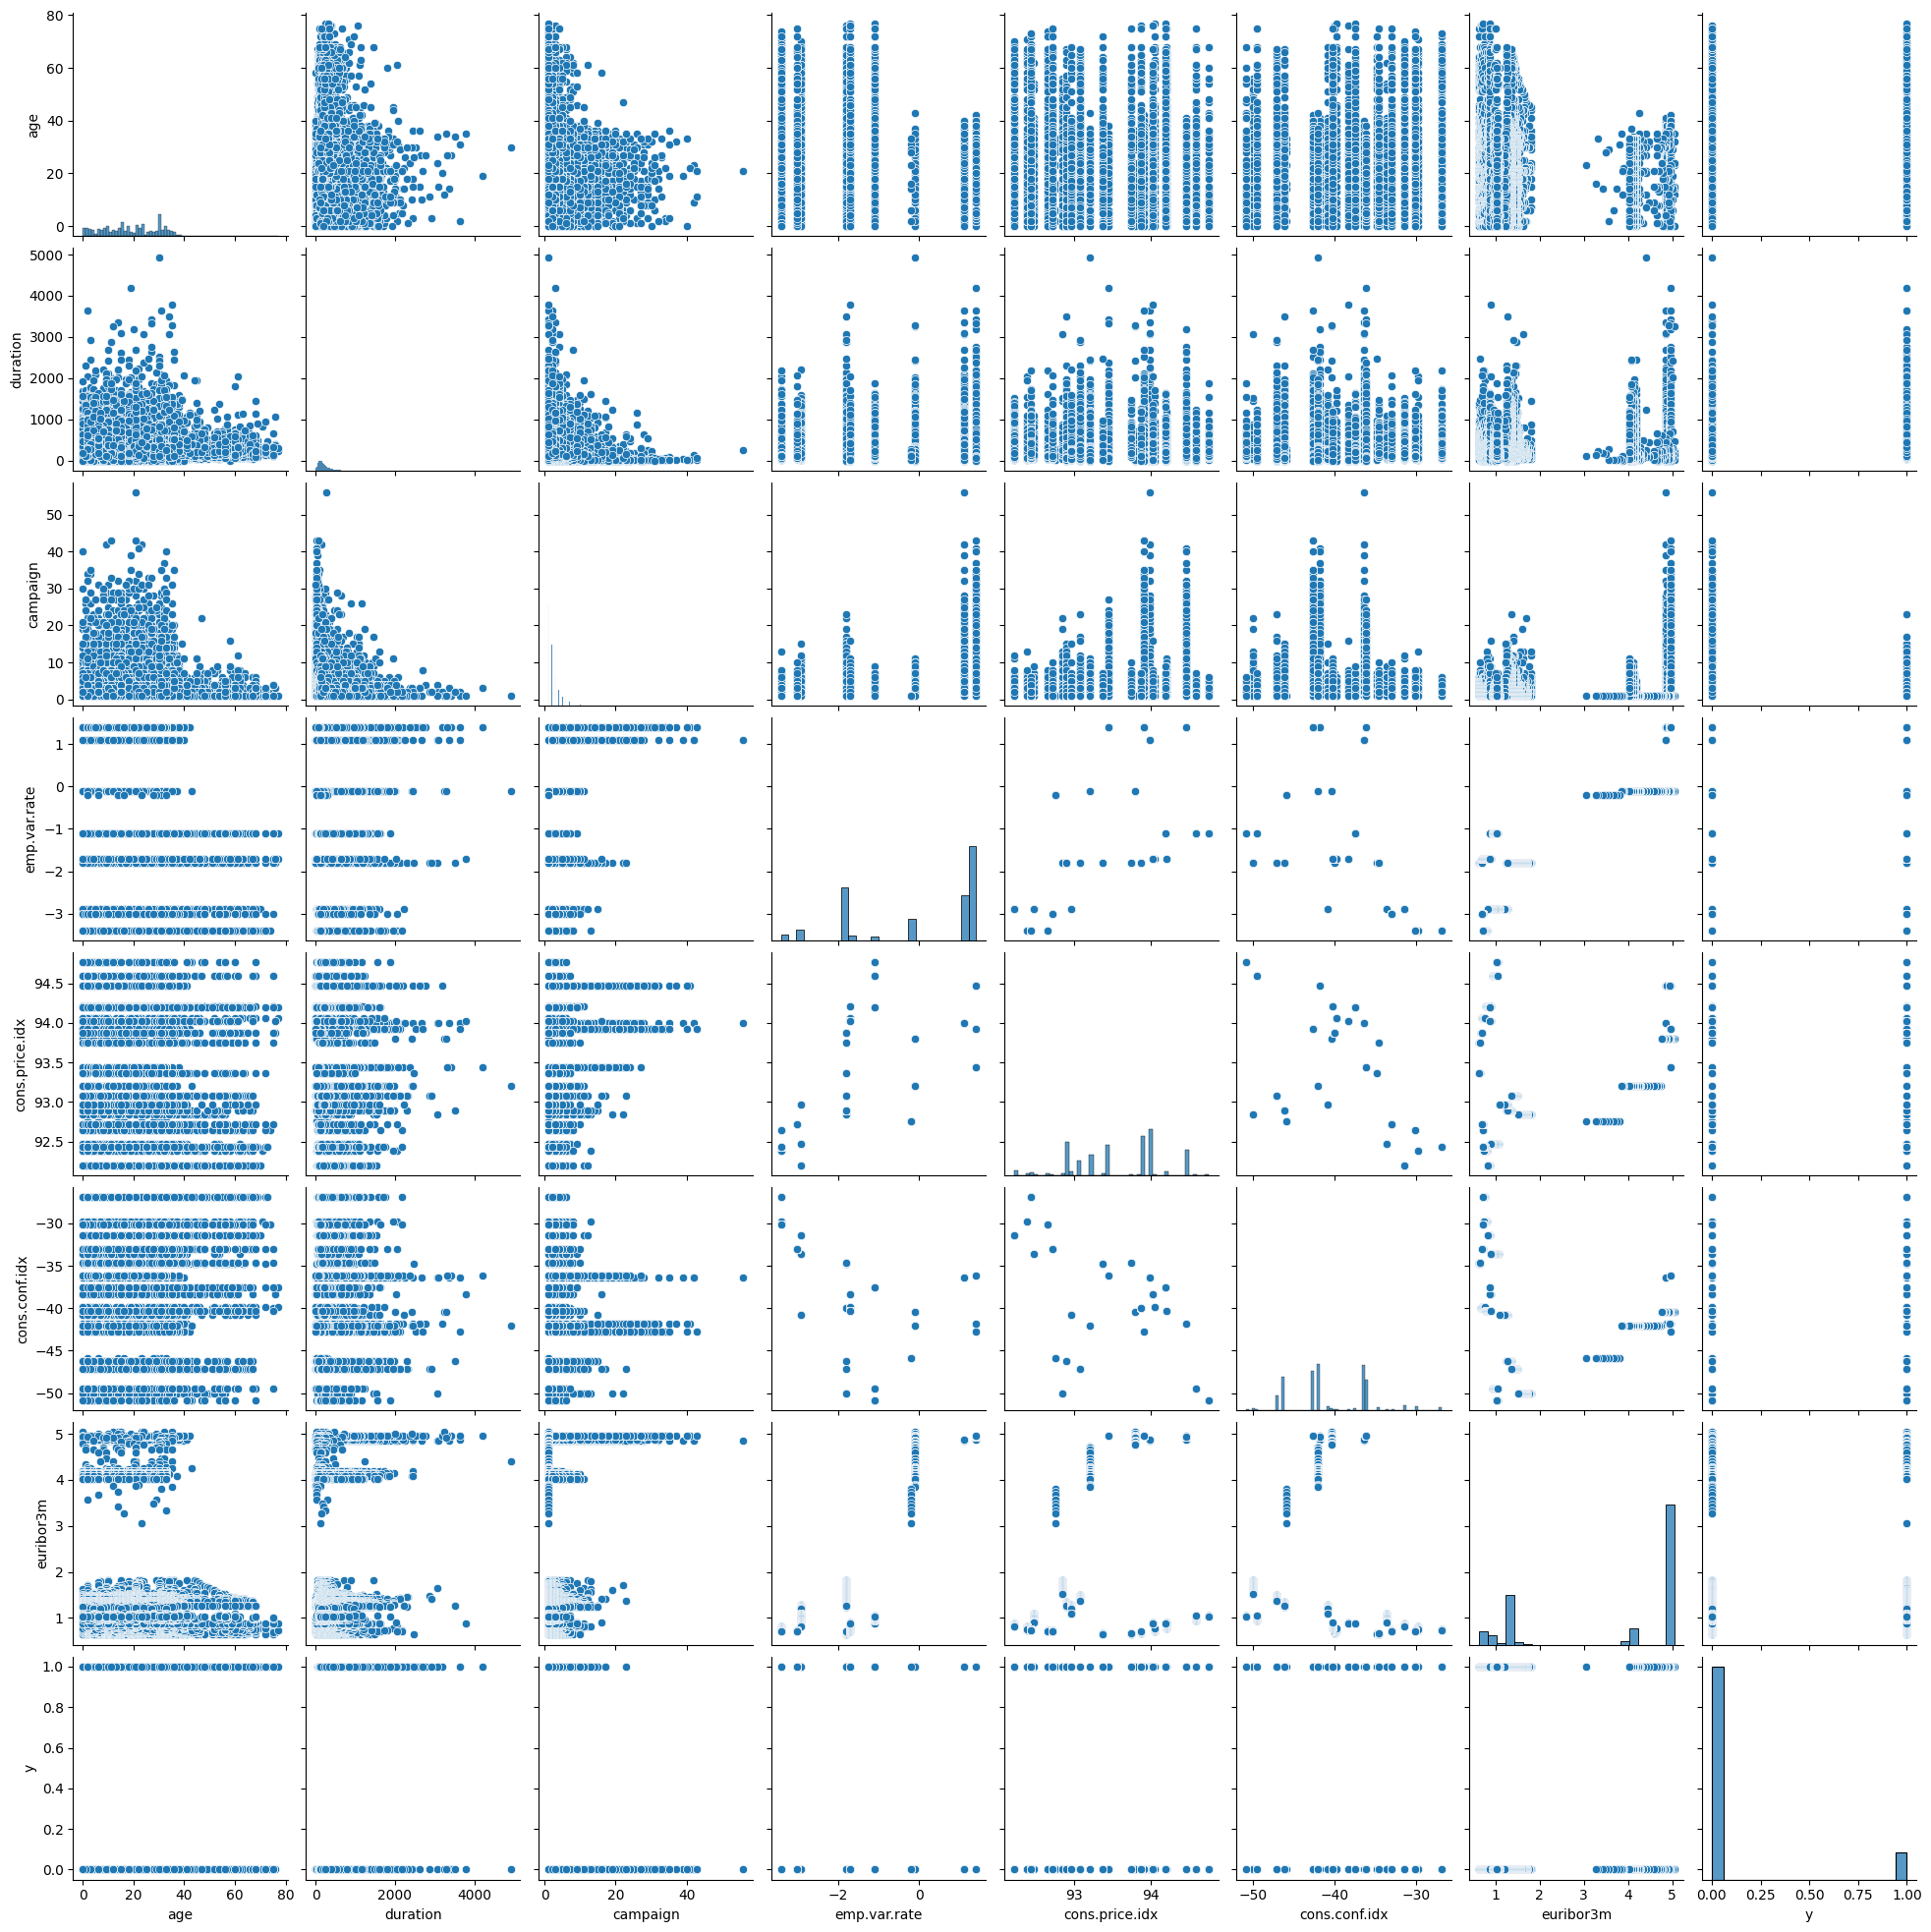

In [26]:
sns.pairplot(data = df)

Feature engineering

In [27]:
#outliers
df.describe()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,19.684282,258.315815,2.567879,0.081922,93.575720,-40.502863,3.621293,0.112663
std,11.889803,259.305321,2.770318,1.570883,0.578839,4.627860,1.734437,0.316184
min,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,0.000000
25%,10.000000,102.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,0.000000
50%,19.000000,180.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,0.000000
75%,30.000000,319.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,0.000000
max,77.000000,4918.000000,56.000000,1.400000,94.767000,-26.900000,5.045000,1.000000


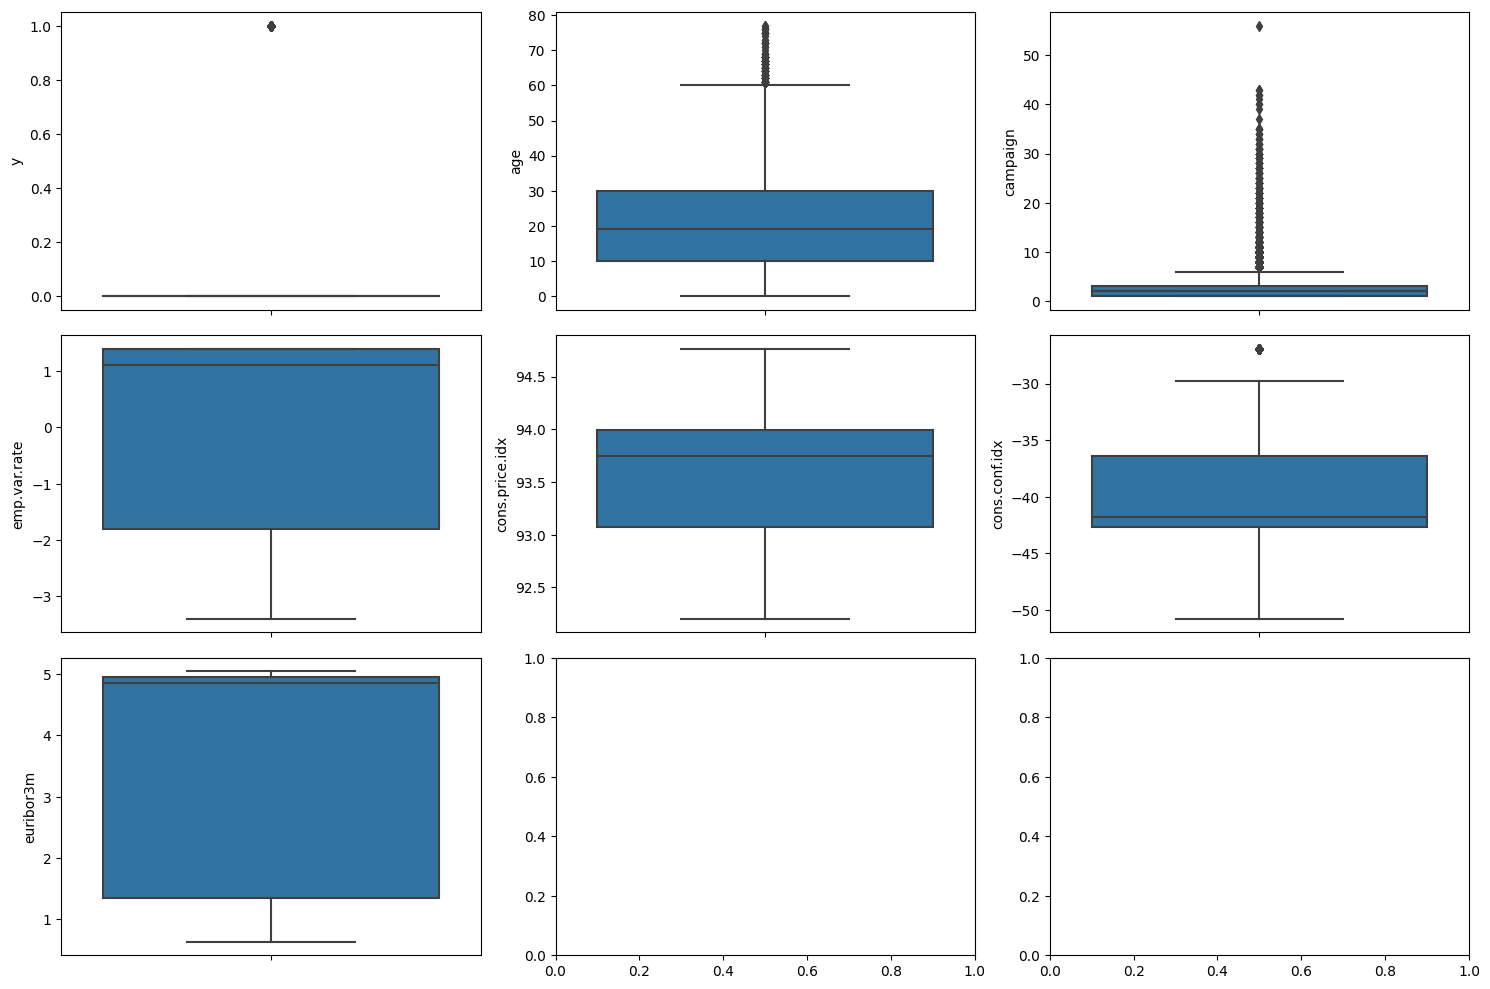

In [28]:
#pintamos los boxplots
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "y")
sns.boxplot(ax = axis[0, 1], data = df, y = "age")
sns.boxplot(ax = axis[0, 2], data = df, y = "campaign")
sns.boxplot(ax = axis[1, 0], data = df, y = "emp.var.rate")
sns.boxplot(ax = axis[1, 1], data = df, y = "cons.price.idx")
sns.boxplot(ax = axis[1, 2], data = df, y = "cons.conf.idx")
sns.boxplot(ax = axis[2, 0], data = df, y = "euribor3m")

plt.tight_layout()

plt.show()

In [29]:
# Variables de interés
variables_interes = ["y", "age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# Obtener estadísticas descriptivas para cada variable
for variable in variables_interes:
    variable_stats = df[variable].describe()
    print(f"\nEstadísticas descriptivas para {variable}:\n{variable_stats}")


Estadísticas descriptivas para y:
count    41176.000000
mean         0.112663
std          0.316184
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

Estadísticas descriptivas para age:
count    41176.000000
mean        19.684282
std         11.889803
min          0.000000
25%         10.000000
50%         19.000000
75%         30.000000
max         77.000000
Name: age, dtype: float64

Estadísticas descriptivas para campaign:
count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

Estadísticas descriptivas para emp.var.rate:
count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

Estadísticas descri

In [30]:
# Variables de interés
variables_interes = ["y", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# Calcular límites superior e inferior para la búsqueda de outliers para cada variable
for variable in variables_interes:
    variable_stats = df[variable].describe()

    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    print(f"\nLímites superior e inferior para la búsqueda de outliers de {variable}:")
    print(f"Superior: {round(upper_limit, 2)}, Inferior: {round(lower_limit, 2)}, Rango intercuartílico: {round(iqr, 2)}")



Límites superior e inferior para la búsqueda de outliers de y:
Superior: 0.0, Inferior: 0.0, Rango intercuartílico: 0.0

Límites superior e inferior para la búsqueda de outliers de campaign:
Superior: 6.0, Inferior: -2.0, Rango intercuartílico: 2.0

Límites superior e inferior para la búsqueda de outliers de emp.var.rate:
Superior: 6.2, Inferior: -6.6, Rango intercuartílico: 3.2

Límites superior e inferior para la búsqueda de outliers de cons.price.idx:
Superior: 95.37, Inferior: 91.7, Rango intercuartílico: 0.92

Límites superior e inferior para la búsqueda de outliers de cons.conf.idx:
Superior: -26.95, Inferior: -52.15, Rango intercuartílico: 6.3

Límites superior e inferior para la búsqueda de outliers de euribor3m:
Superior: 10.39, Inferior: -4.08, Rango intercuartílico: 3.62


¿Sumar o restar el Rango intercuartílico a los límites?


Límite superior: 6.0
Límite inferior: -2.0
Rango intercuartílico: 2.0
Variable "emp.var.rate":

Límite superior: 6.2
Límite inferior: -6.6
Rango intercuartílico: 3.2
Variable "cons.price.idx":

Límite superior: 95.37
Límite inferior: 91.7
Rango intercuartílico: 0.92
Variable "cons.conf.idx":

Límite superior: -26.95
Límite inferior: -52.15
Rango intercuartílico: 6.3
Variable "euribor3m":

Límite superior: 10.39
Límite inferior: -4.08
Rango intercuartílico: 3.62

Una vez aclarado este tema, eliminar outlier (valores atipicos)

In [35]:
df.shape
print("before")
import pandas as pd

# Definir los límites para cada variable
limits = {
    "y": (None, None),  # No hay límites para "y"
    "campaign": (-2.0, 6.0),
    "emp.var.rate": (-6.6, 6.2),
    "cons.price.idx": (91.7, 95.37),
    "cons.conf.idx": (-52.15, -26.95),
    "euribor3m": (-4.08, 10.39)
}

# Iterar a través de cada variable y aplicar los límites para eliminar outliers
for column, (lower_limit, upper_limit) in limits.items():
    if lower_limit is not None:
        df = df[df[column] > lower_limit]
    if upper_limit is not None:
        df = df[df[column] < upper_limit]

# Ver el DataFrame resultante sin outliers
print(df)
print("after")

before
       age          job  marital            education  default housing loan  \
0        0    housemaid  married             basic.4y       no      no   no   
1        1     services  married          high.school  unknown      no   no   
2        2     services  married          high.school       no     yes   no   
3        3       admin.  married             basic.6y       no      no   no   
4        0     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   48      retired  married  professional.course       no     yes   no   
41184   12  blue-collar  married  professional.course       no      no   no   
41185    0      retired  married    university.degree       no     yes   no   
41186   23   technician  married  professional.course       no      no   no   
41187   68      retired  married  professional.course       no     yes   no   

       duration  campaign     poutcome  emp.

In [36]:
df.shape

(37347, 15)

In [37]:
#Eliminación de valores nulos
valores_nulos = df.isnull().sum().sort_values(ascending=False)
print(valores_nulos, "No hay valores nulos")

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
dtype: int64 No hay valores nulos


Inferencia de nuevas características no parece aplicar

Escalado de valores -> Normalización: Es una técnica que cambia el rango de los valores de los datos para que puedan ser comparables entre sí. El escalado normalmente implica la normalización, que es el proceso de cambiar los valores para que tengan una media de 0 y una desviación estándar de 1

Normalización

In [38]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con las variables de interés
num_variables = ["age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(df[num_variables])
df_norm = pd.DataFrame(norm_features, index=df.index, columns=num_variables)
df_norm["y"] = df["y"]  # Variable objetivo
df_norm.head()


,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,-1.662303,-0.839976,0.665899,0.735657,0.948114,0.724559,0
1,-1.577726,-0.839976,0.665899,0.735657,0.948114,0.724559,0
2,-1.493150,-0.839976,0.665899,0.735657,0.948114,0.724559,0
3,-1.408573,-0.839976,0.665899,0.735657,0.948114,0.724559,0
4,-1.662303,-0.839976,0.665899,0.735657,0.948114,0.724559,0


Escalado Mínimo-Máximo (aqui no aplica)

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con las variables de interés
num_variables = ["age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[num_variables])
df_scaled = pd.DataFrame(scaled_features, index=df.index, columns=num_variables)
df_scaled["y"] = df["y"]  # Asegúrate de incluir tu variable objetivo si es necesario
df_scaled.head()'''


Feature Selection (el modelo al final es min max)

In [78]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming you have already defined your DataFrame df

# Encode categorical variables
le = LabelEncoder()
df_encoded = df.apply(lambda x: le.fit_transform(x) if x.dtype == 'O' else x)

# Divide the dataset into training and test samples.
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Scale the features to [0, 1] range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use random_state to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# With a value of k = 5, we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train, y_train)

# Get the indices of the selected features
ix = selection_model.get_support()

# Extract the selected features for both training and test sets
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X.columns.values[ix])

# Display the selected features
print(X_train_sel.head())



   default  duration  emp.var.rate  cons.price.idx  euribor3m
0      0.0  0.091704      1.000000        0.484412   0.981410
1      0.5  0.052460      1.000000        0.669135   0.981183
2      0.0  0.010573      0.354167        0.722525   0.015416
3      0.5  0.022977      0.937500        0.698753   0.957606
4      0.0  0.041887      0.333333        0.269680   0.148946


In [79]:
X_test_sel.head()

,default,duration,emp.var.rate,cons.price.idx,euribor3m
0,0.0,0.022570,0.937500,0.698753,0.957153
1,0.0,0.048597,0.333333,0.269680,0.139651
2,0.0,0.089874,0.687500,0.389322,0.780322
3,0.0,0.020333,1.000000,0.882307,0.980503
4,0.0,0.078894,0.333333,0.603274,0.005668


In [80]:
X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

In [81]:
X_train_sel.to_csv("clean-bank-marketing-campaign-data.train.csv", index=False)
X_test_sel.to_csv("clean-bank-marketing-campaign-data.test.csv", index=False)

In [82]:
# Guardar los DataFrames en archivos CSV
X_train_sel.to_csv("clean-bank-marketing-campaign-data.train.csv", index=False)
X_test_sel.to_csv("clean-bank-marketing-campaign-data.test.csv", index=False)


Construcción de modelo de regresión logistica

In [83]:
#importación de datos
import pandas as pd

train_data = pd.read_csv("clean-bank-marketing-campaign-data.train.csv")
test_data = pd.read_csv("clean-bank-marketing-campaign-data.test.csv")

train_data.head()

,default,duration,emp.var.rate,cons.price.idx,euribor3m,y
0,0.0,0.091704,1.000000,0.484412,0.981410,0
1,0.5,0.052460,1.000000,0.669135,0.981183,0
2,0.0,0.010573,0.354167,0.722525,0.015416,0
3,0.5,0.022977,0.937500,0.698753,0.957606,0
4,0.0,0.041887,0.333333,0.269680,0.148946,0


Optimización del modelo

In [84]:
#Paso 1 división de variables predictoras según modelos de testeo y modelo de entrenamiento
X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

In [96]:
#Paso 2: Inicialización y entrenamiento del modelo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba con random_state
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializa el modelo con random_state
model = LogisticRegression(random_state=42)

# Entrena el modelo
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [97]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9077643908969211

In [99]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

# Calcula la precisión y conviértela a porcentaje
accuracy = accuracy_score(y_test, y_pred)
accuracy_porcentaje = accuracy * 100

print(f'La Precisión del modelo es de: {accuracy_porcentaje:.2f}%')


La Precisión del modelo es de: 90.78%


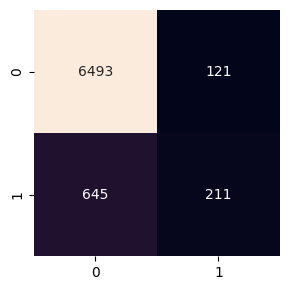

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

mkt_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
mkt_df = pd.DataFrame(mkt_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La interpretación de una matriz de confusión es la siguiente:

✅Verdaderos positivos (TP, True positive): Se corresponde con el número 6493 y son los casos en los que el modelo predijo positivo (no supervivencia) y la clase real también es positiva.
✅Verdaderos negativos (TN, False negative): Se corresponde con el número 211 y son los casos en los que el modelo predijo negativo (supervivencia) y la clase real también es negativa.
⛔Falsos positivos (FP, False positive): Se corresponde con el número 645 y son los casos en los que el modelo predijo positivo y la clase real es negativa.
⛔Falsos negativos (FN, False negative): Se corresponde con el número 121 y son los casos en los que el modelo predijo negativo y la clase real es positiva.
Estas cuatro medidas se utilizan a menudo para calcular métricas más complejas

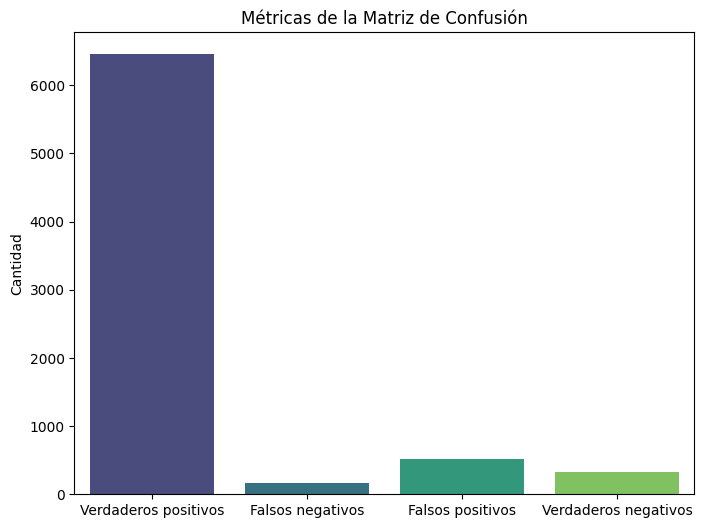

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Definir métricas
tp, fn, fp, tn = cm.ravel()

# Etiquetas y valores para el gráfico
labels = ['Verdaderos positivos', 'Falsos negativos', 'Falsos positivos', 'Verdaderos negativos']
values = [tp, fn, fp, tn]

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, palette='viridis')
plt.title('Métricas de la Matriz de Confusión')
plt.ylabel('Cantidad')
plt.show()


Optimización de hiperparámetros

In [107]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros a mano que queremos ajustar
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

Mejora con grid search

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba con random_state
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializa el modelo base con random_state
base_model = LogisticRegression(random_state=42)

# Definimos los parámetros a mano que queremos ajustar
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializa la cuadrícula con random_state
grid = GridSearchCV(base_model, hyperparams, scoring="accuracy", cv=5)


In [102]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba con random_state
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo con parámetros corregidos y random_state
model_grid = LogisticRegression(penalty='l2', C=100, solver="sag", random_state=42)
model_grid.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model_grid.predict(X_test)

# Calcula la precisión
grid_accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", grid_accuracy)



Precisión del modelo: 0.9085676037483267


Mejora

In [109]:
# Valores originales
original_valor = 0.9077643908969211
nuevo_valor = 0.9085676037483267

# Calcular la mejora porcentual
mejora_porcentaje = ((nuevo_valor - original_valor) / original_valor) * 100

print("Mejora porcentual:", mejora_porcentaje)


Mejora porcentual: 0.08848252470137012


Mejora Aleatoria

In [110]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [111]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 29.763514416313132}


Reentrenamiento del modelo

In [112]:
model_random_search = LogisticRegression(penalty = "l2", C = 29.7635, solver = "lbfgs")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9085676037483267

In [113]:
# Valores originales
original_valor = 0.9077643908969211
nuevo_valor = 0.9085676037483267


# Calcular la mejora porcentual
mejora_porcentaje = ((nuevo_valor - original_valor) / original_valor) * 100

print("Mejora porcentual:", mejora_porcentaje)

Mejora porcentual: 0.08848252470137012
